In [1]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
%cd Thesis/eyediease/data/raw/DDR/

/content/drive/My Drive/Colab Notebooks/Thesis/eyediease/data/raw/DDR


In [19]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
%matplotlib inline

In [9]:
train_img = Path('DDR-dataset/lesion_segmentation') / 'train' /'img'
train_mask = Path('DDR-dataset/lesion_segmentation') / 'train'/ 'labelcol'

val_img = Path('DDR-dataset/lesion_segmentation') / 'valid' /'img'
val_mask = Path('DDR-dataset/lesion_segmentation') / 'valid'/ 'labelcol'

test_img = Path('DDR-dataset/lesion_segmentation') / 'test' /'img'
test_mask = Path('DDR-dataset/lesion_segmentation') / 'test'/ 'labelcol'

In [10]:
print('Number train imgs', len(list(train_img.glob('*.*'))))
print('Number train EX', len(list((train_mask / 'EX').glob('*.*'))))
print('Number train SE', len(list((train_mask / 'SE').glob('*.*'))))
print('Number train MA', len(list((train_mask / 'MA').glob('*.*'))))
print('Number train HE', len(list((train_mask / 'HE').glob('*.*'))))

print('Number val imgs', len(list(val_img.glob('*.*'))))
print('Number val EX', len(list((val_mask / 'EX').glob('*.*'))))
print('Number val SE', len(list((val_mask / 'SE').glob('*.*'))))
print('Number val MA', len(list((val_mask / 'MA').glob('*.*'))))
print('Number val HE', len(list((val_mask / 'HE').glob('*.*'))))

print('Number test imgs', len(list(test_img.glob('*.*'))))
print('Number test EX', len(list((test_mask / 'EX').glob('*.*'))))
print('Number test SE', len(list((test_mask / 'SE').glob('*.*'))))
print('Number test MA', len(list((test_mask / 'MA').glob('*.*'))))
print('Number test HE', len(list((test_mask / 'HE').glob('*.*'))))

Number train imgs 383
Number train EX 383
Number train SE 383
Number train MA 383
Number train HE 383
Number val imgs 149
Number val EX 149
Number val SE 149
Number val MA 149
Number val HE 149
Number test imgs 225
Number test EX 225
Number test SE 225
Number test MA 225
Number test HE 225


In [17]:
prev_shape = None
cur_shape = None
for img in sorted(train_img.glob('*.*')):
  image = Image.open(img).convert('RGB')
  image = np.asarray(image).astype('uint8')
  cur_shape = image.shape
  if prev_shape is None:
    prev_shape = cur_shape
  else:
    if prev_shape == cur_shape:
      print('Not change')
      print('Cur size', cur_shape)
      print('-'*30)
      continue
    else:
      print('Image size is not consistent')
      print('Image name', img.name)
      print('Current', cur_shape)
      print('Prev', prev_shape)
      print('-'*30)
    prev_shape = cur_shape

Not change
Cur size (1728, 2592, 3)
------------------------------
Image size is not consistent
Image name 007-1811-100.jpg
Current (1934, 1956, 3)
Prev (1728, 2592, 3)
------------------------------
Not change
Cur size (1934, 1956, 3)
------------------------------
Not change
Cur size (1934, 1956, 3)
------------------------------
Not change
Cur size (1934, 1956, 3)
------------------------------
Not change
Cur size (1934, 1956, 3)
------------------------------
Image size is not consistent
Image name 007-1889-100.jpg
Current (1536, 2048, 3)
Prev (1934, 1956, 3)
------------------------------
Not change
Cur size (1536, 2048, 3)
------------------------------
Not change
Cur size (1536, 2048, 3)
------------------------------
Not change
Cur size (1536, 2048, 3)
------------------------------
Not change
Cur size (1536, 2048, 3)
------------------------------
Not change
Cur size (1536, 2048, 3)
------------------------------
Image size is not consistent
Image name 007-1971-100.jpg
Current

In [18]:
EX_mask = sorted((train_mask / 'EX').glob('*.*'))
SE_mask = sorted((train_mask / 'SE').glob('*.*'))
HE_mask = sorted((train_mask / 'HE').glob('*.*'))
MA_mask = sorted((train_mask / 'MA').glob('*.*'))

In [25]:
def visualize_mask(paths):
  plt.figure(figsize=(30, 30))
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    mask = Image.open(paths[random.choice(range(len(paths)))]).convert('L')
    mask = mask.point(lambda x: 255 if x>0 else 0, '1')
    ax.imshow(mask, cmap='gray')
    ax.axis('off')

  plt.show()

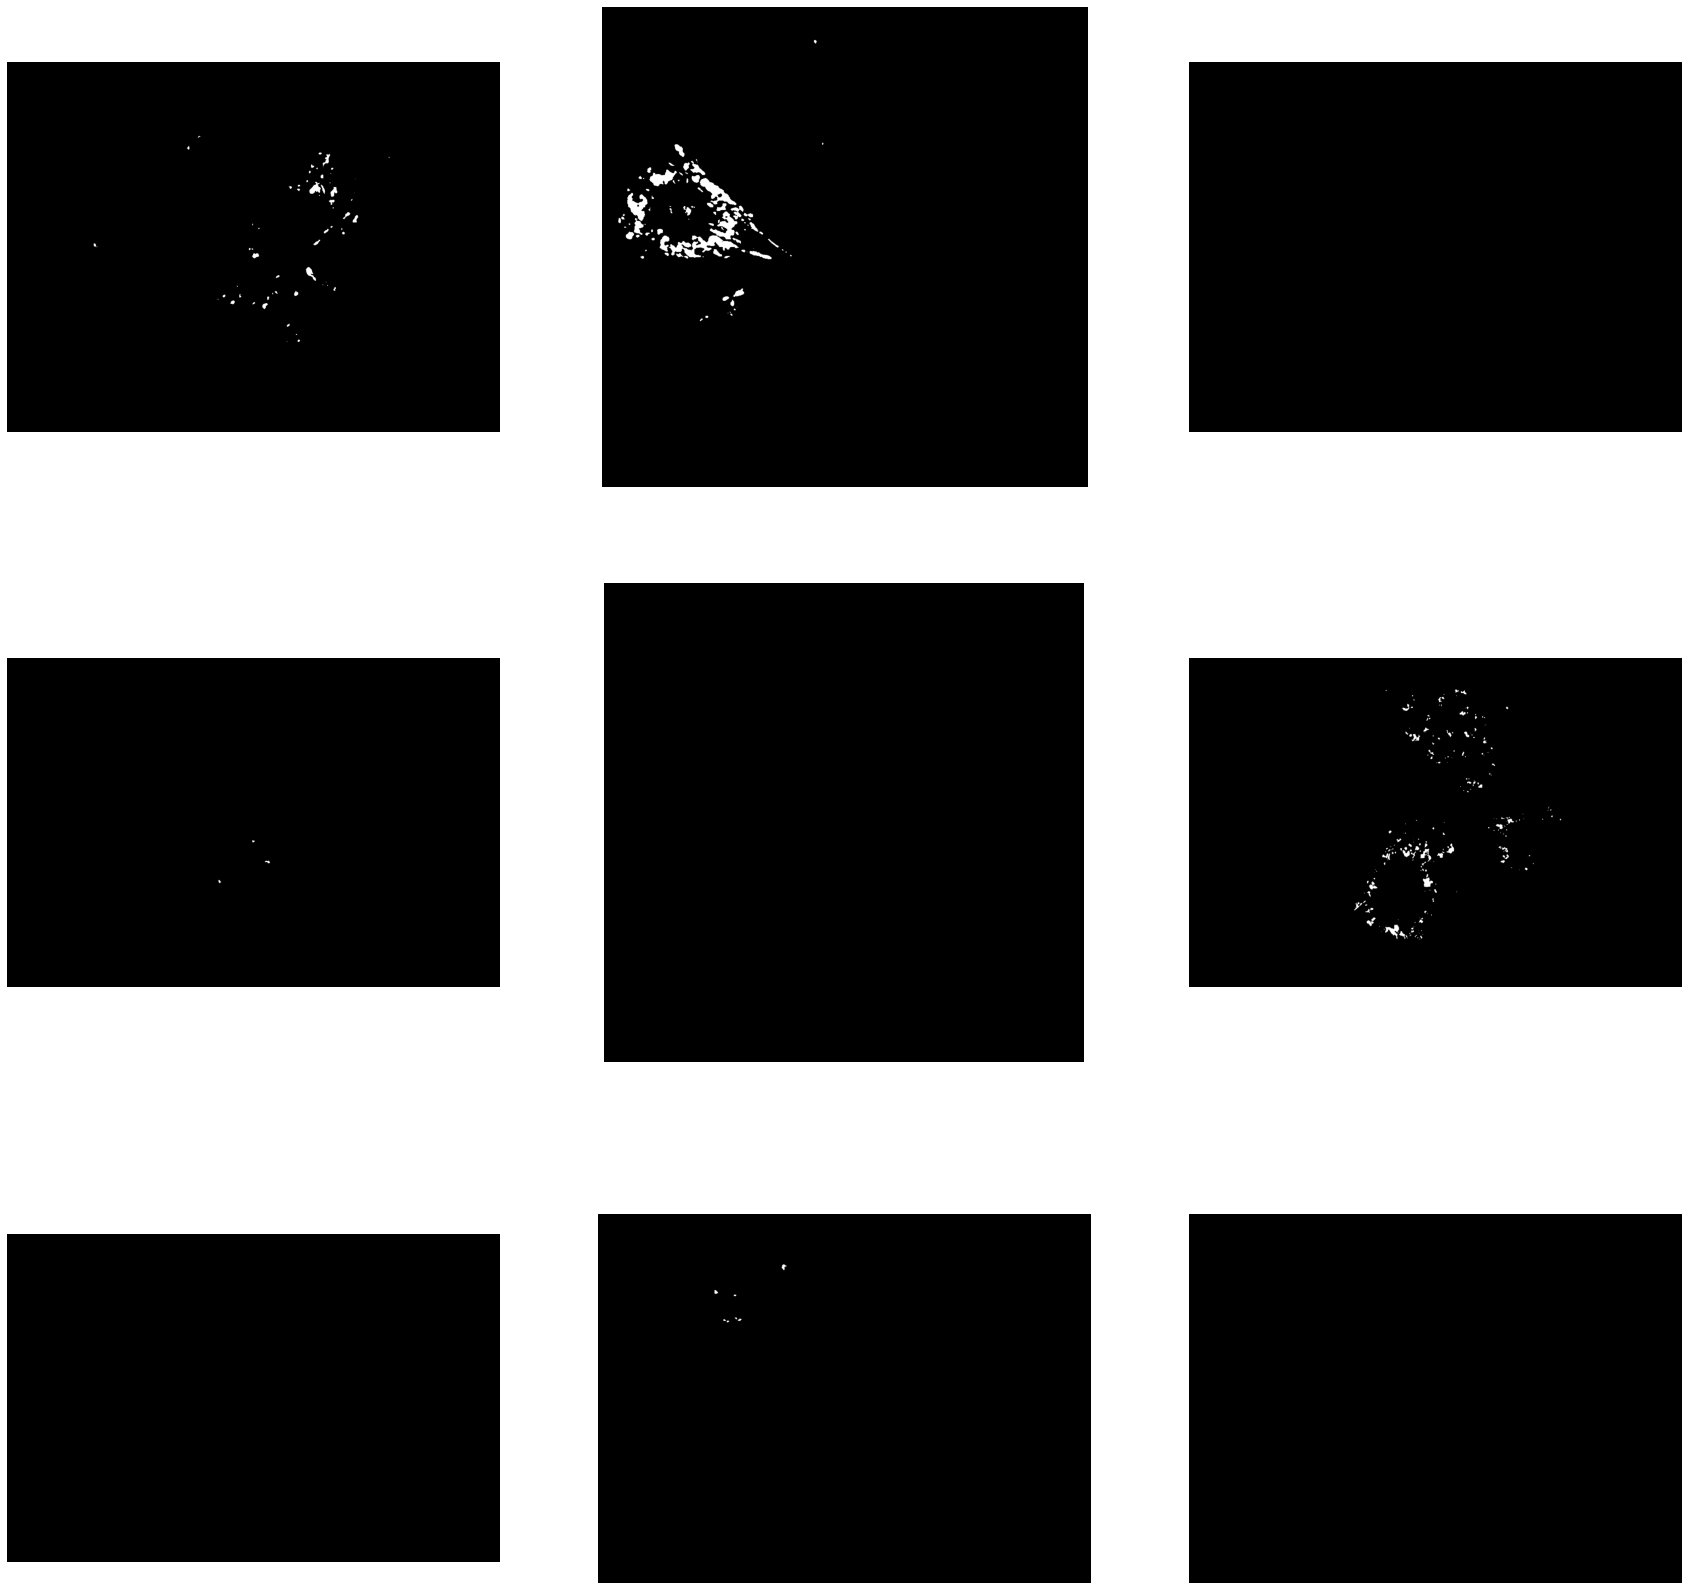

In [26]:
visualize_mask(EX_mask)

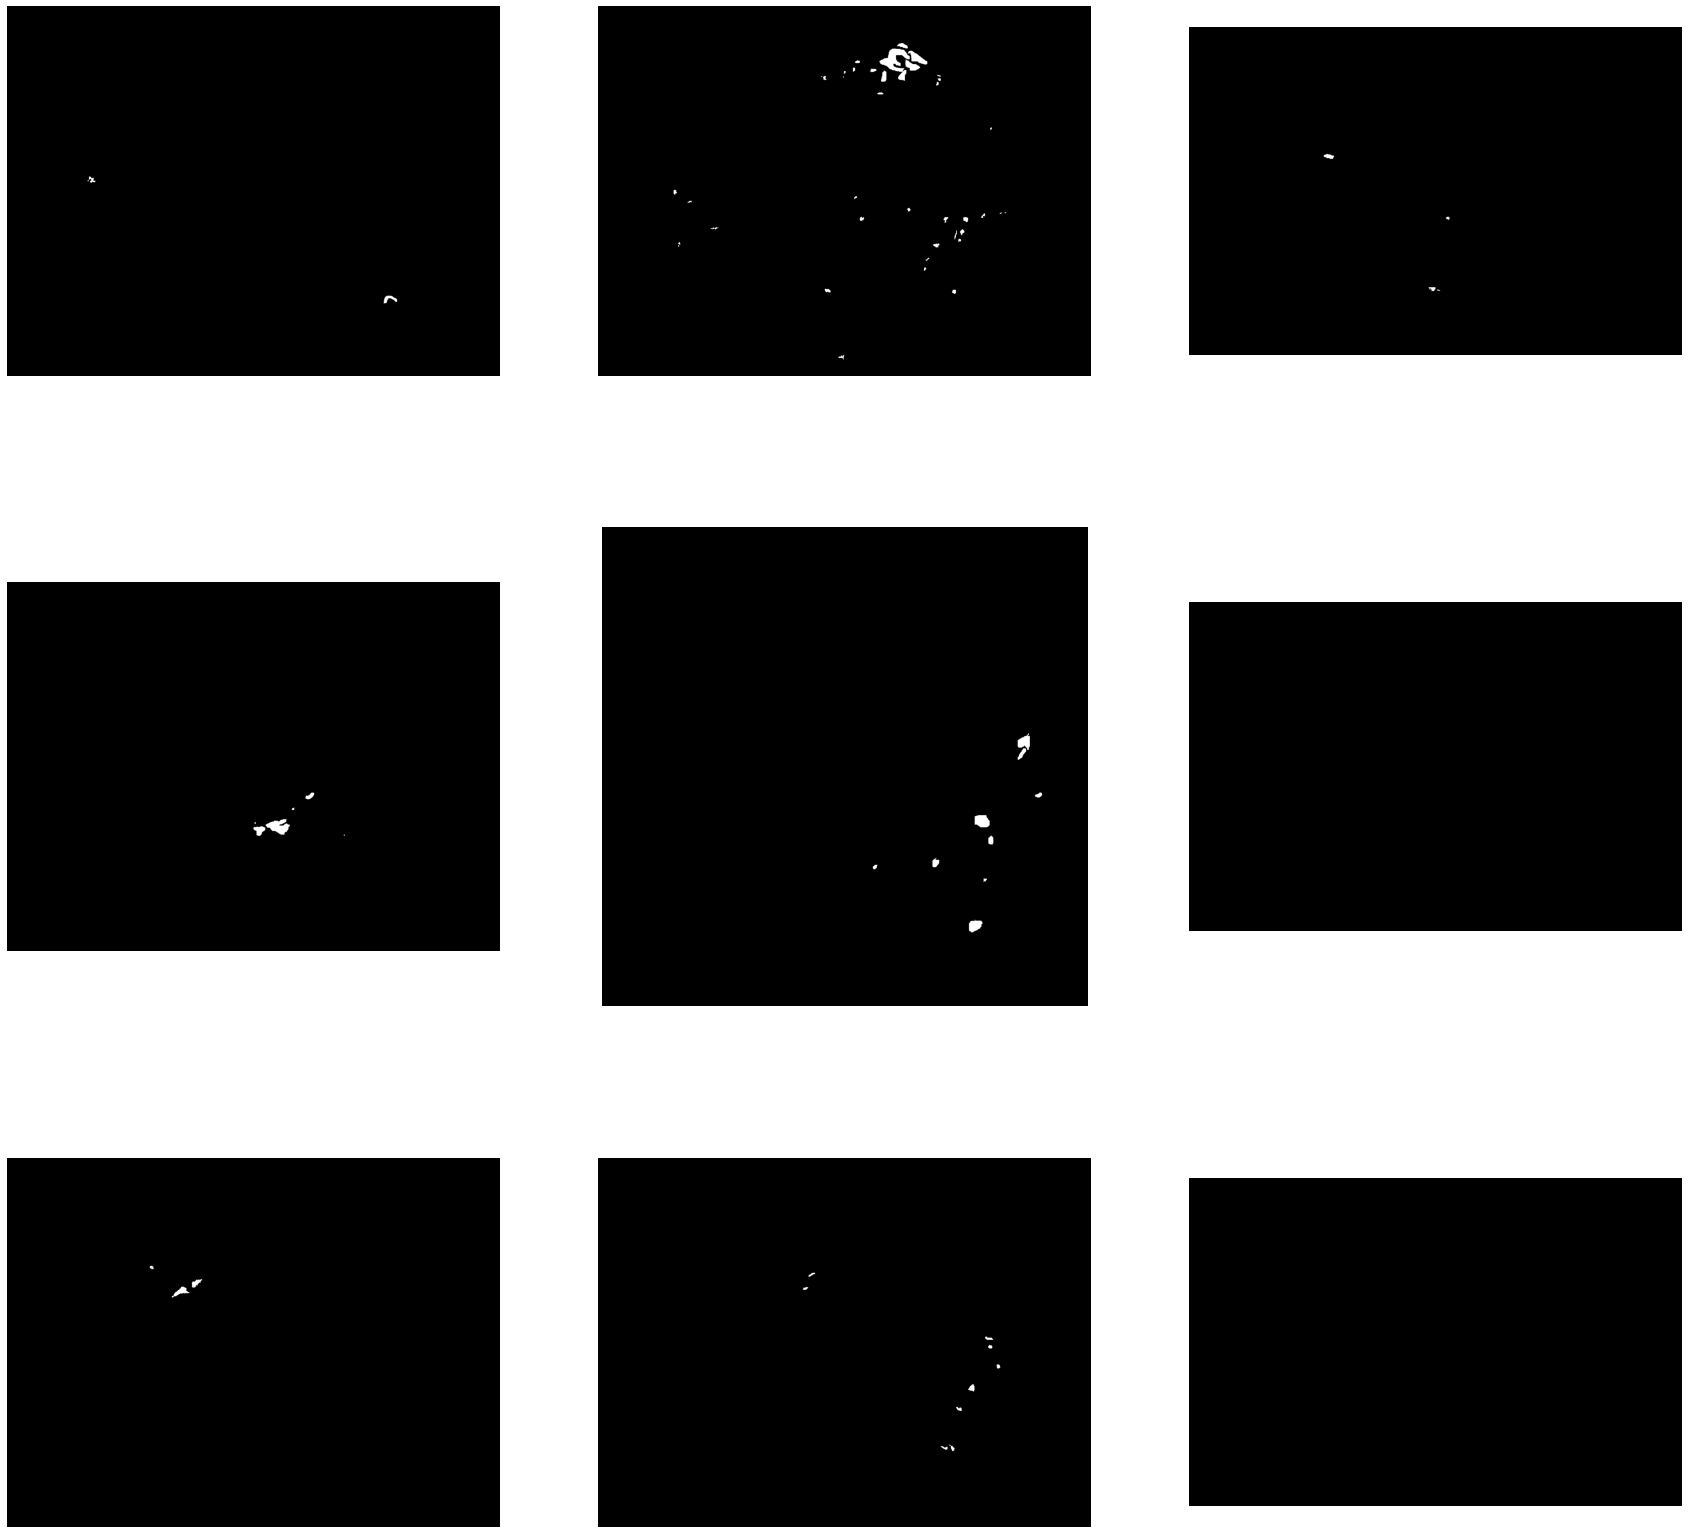

In [27]:
visualize_mask(HE_mask)

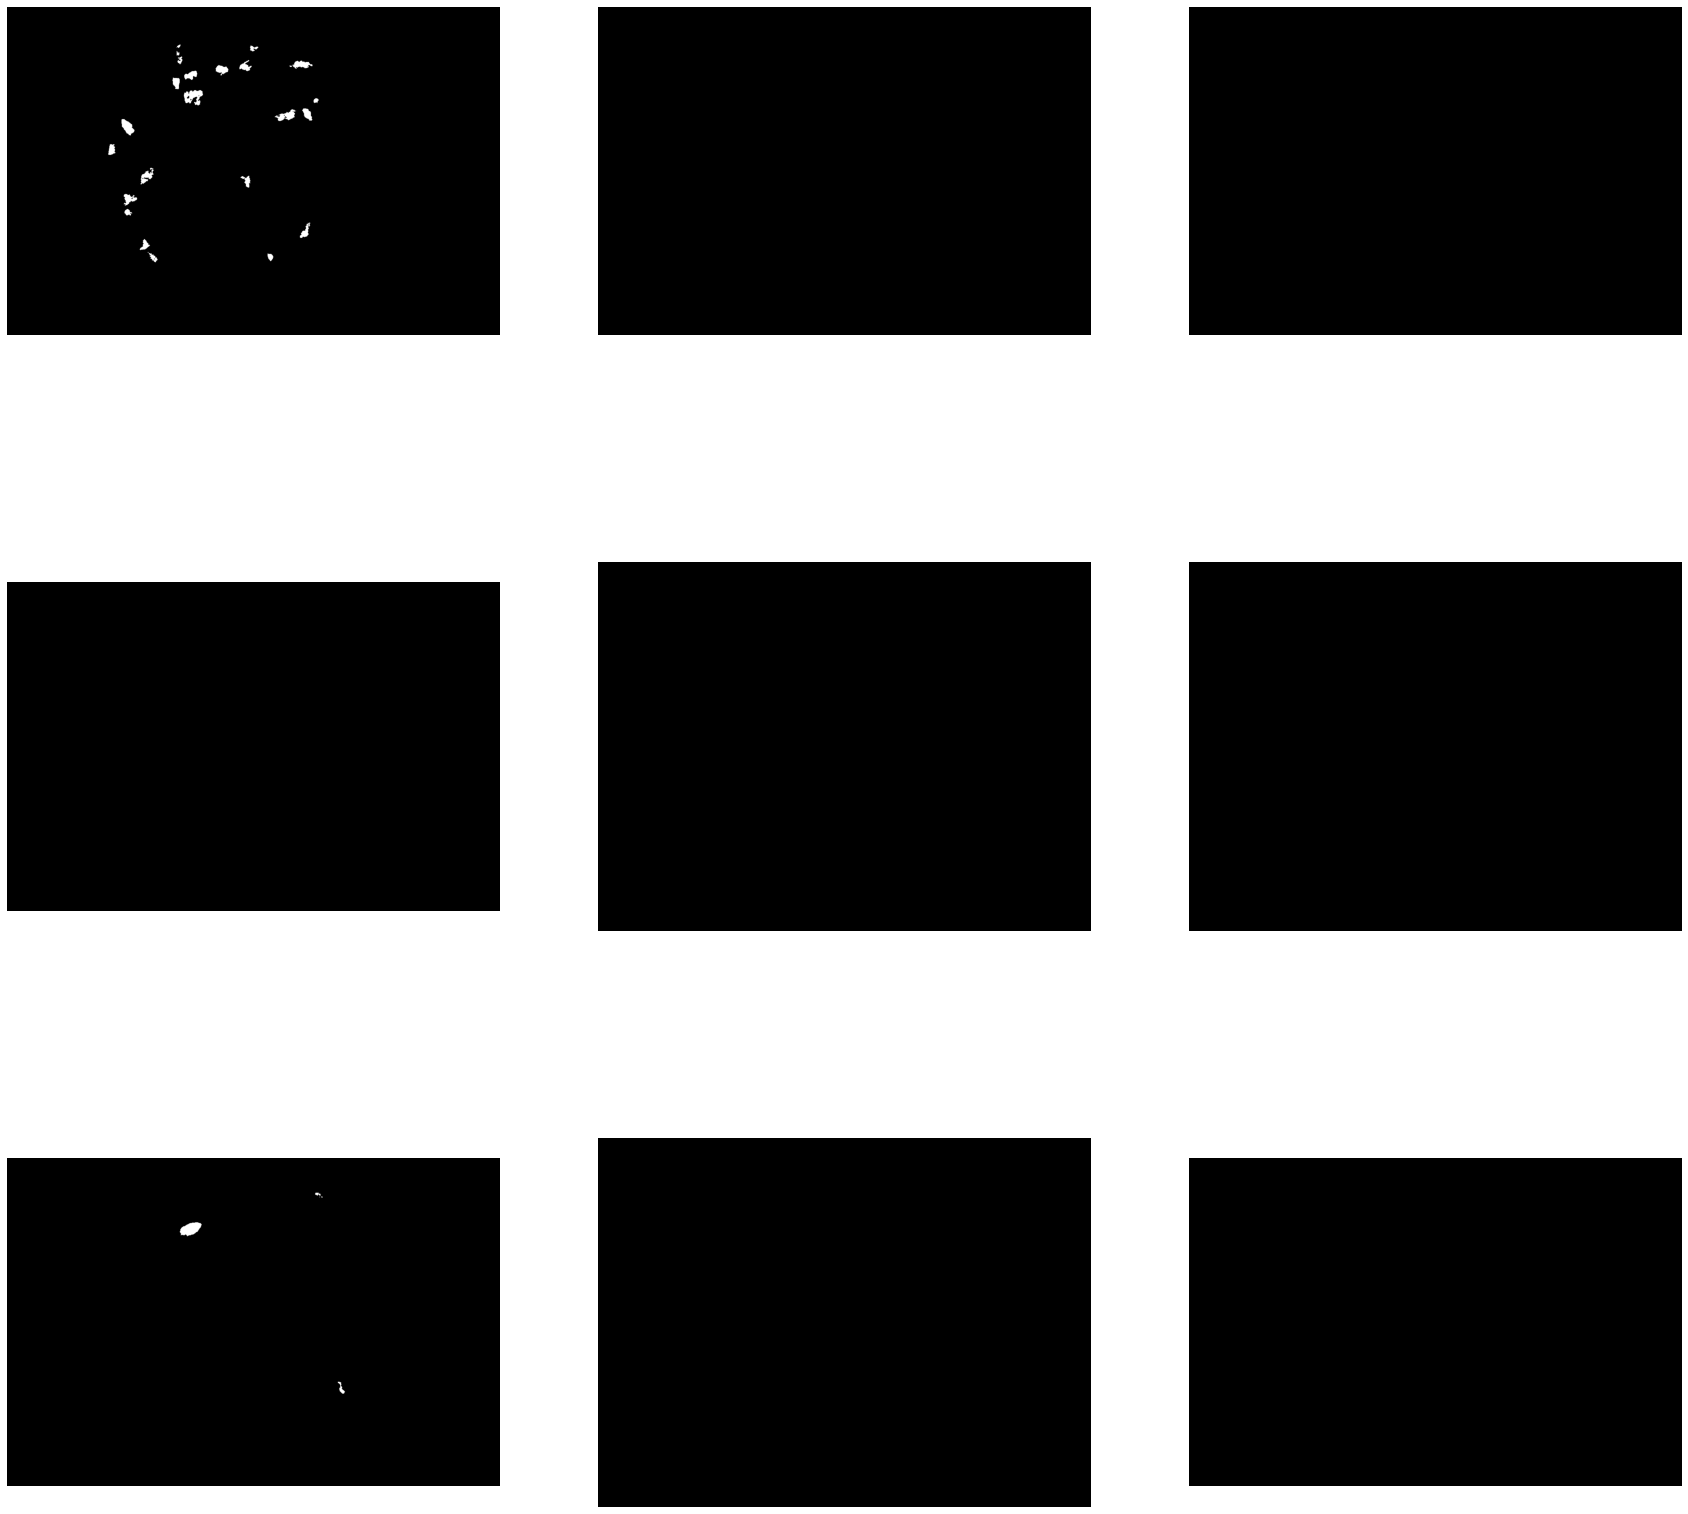

In [28]:
visualize_mask(SE_mask)

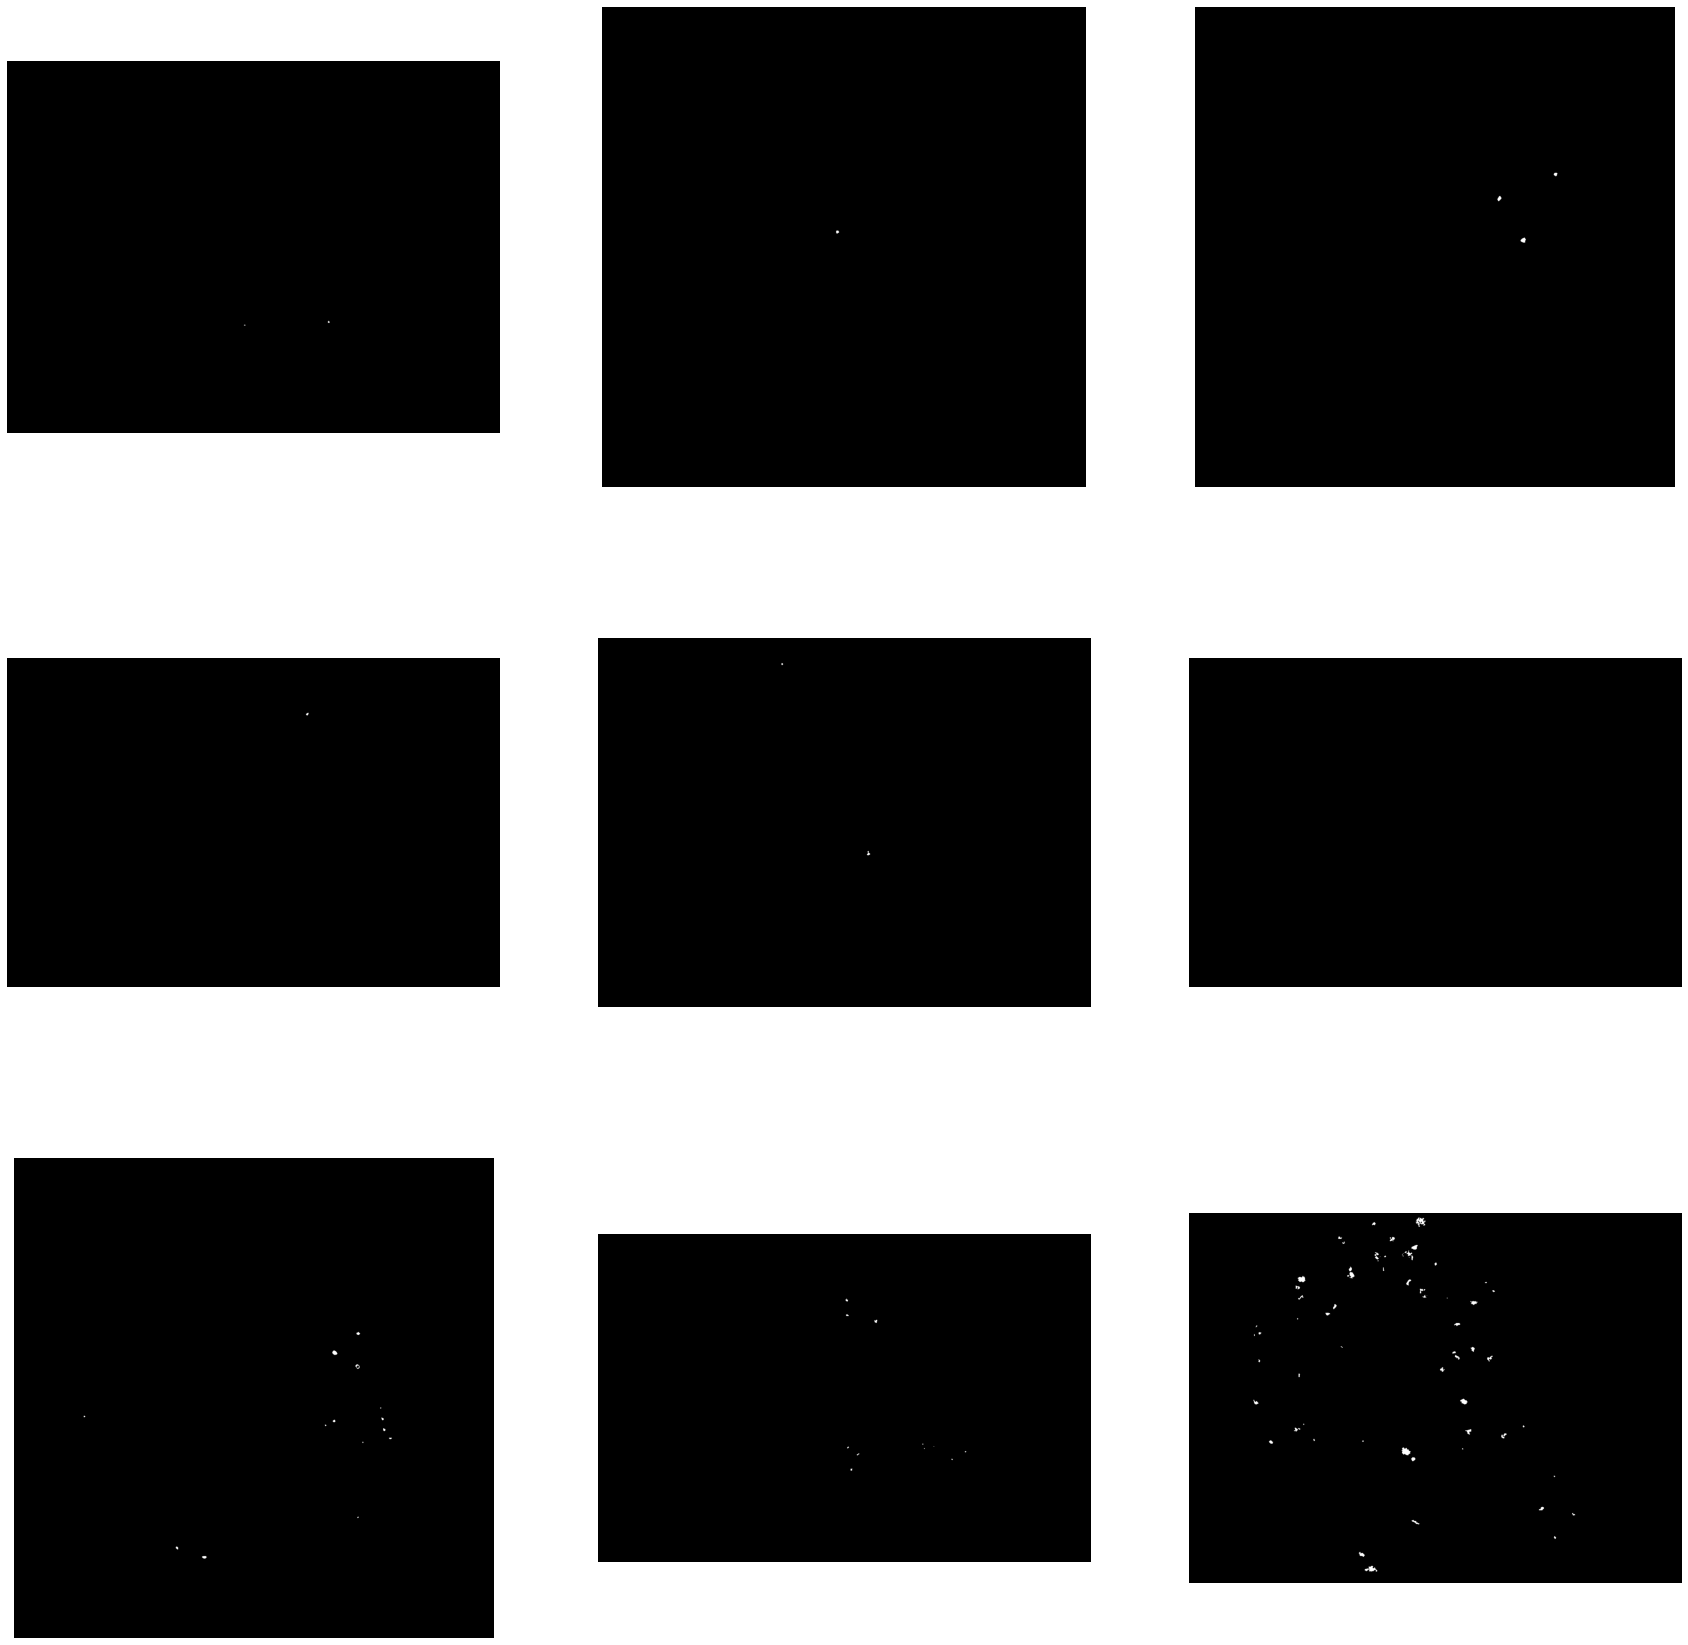

In [29]:
visualize_mask(MA_mask)

In [46]:
def get_area(path):
  fore = []
  for dir in path:
    mask = Image.open(dir).convert('L')
    mask = mask.point(lambda x: 255 if x>0 else 0, '1')
    mask = np.asarray(mask).astype('uint8')
    fg = np.count_nonzero(mask)
    fore.append(fg)

  return fore

In [ ]:
fore_MA = get_area(MA_mask)

In [38]:
MA_path_base_area = sorted(list(zip(MA_mask, fore_MA)), key = lambda i: i[1], reverse=True)

In [39]:
def visualize_mask_area(paths):
  plt.figure(figsize=(30, 30))
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    mask = Image.open(paths[i][0]).convert('L')
    mask = mask.point(lambda x: 255 if x>0 else 0, '1')
    ax.imshow(mask, cmap='gray')
    ax.axis('off')

  plt.show()

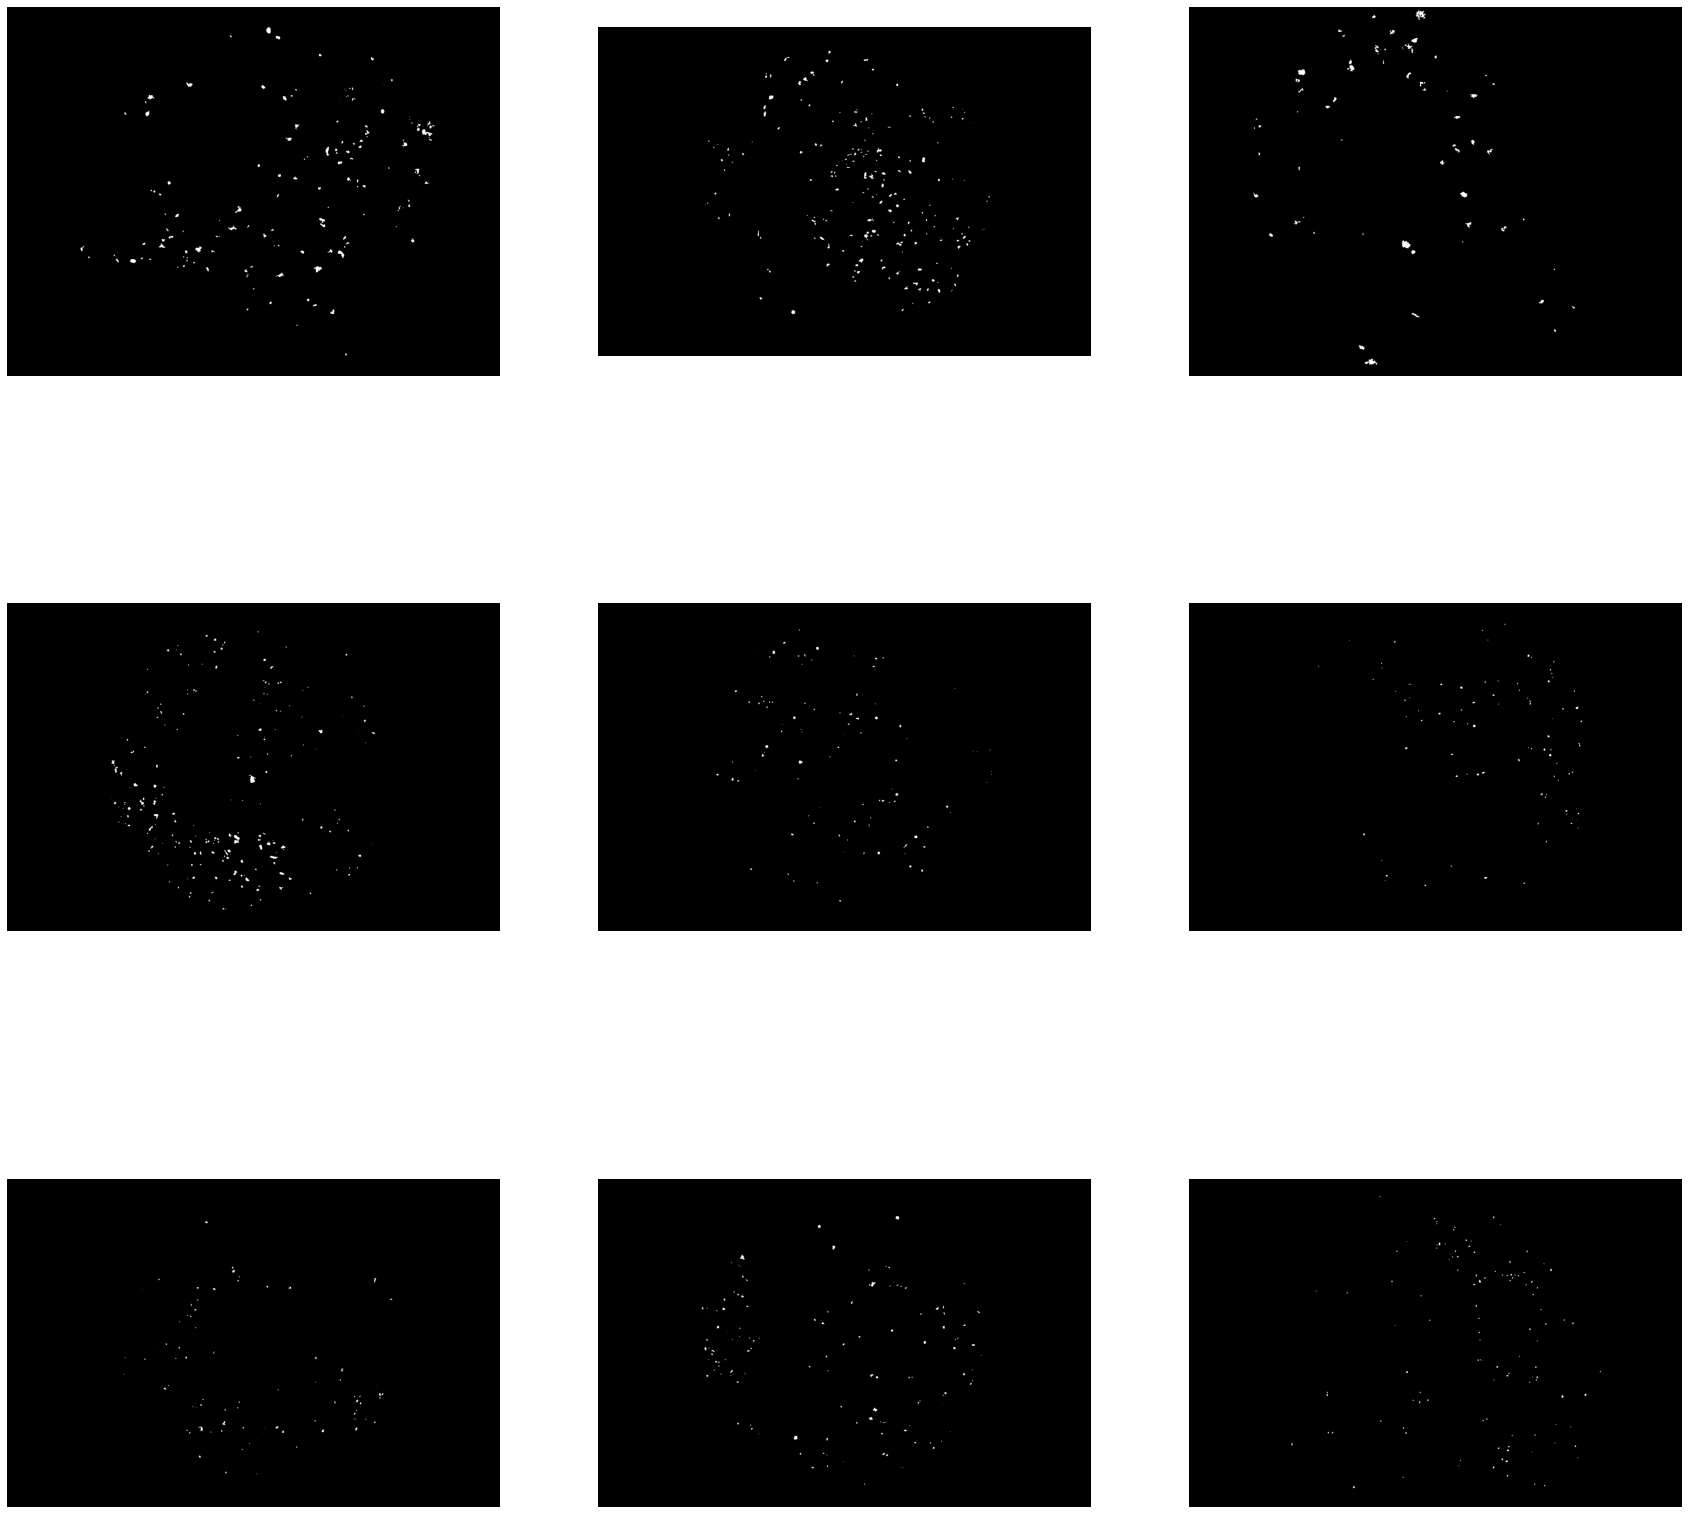

In [40]:
visualize_mask_area(MA_path_base_area)

In [47]:
fore_EX = get_area(EX_mask)

In [48]:
EX_path_base_area = sorted(list(zip(EX_mask, fore_EX)), key = lambda i: i[1], reverse=True)

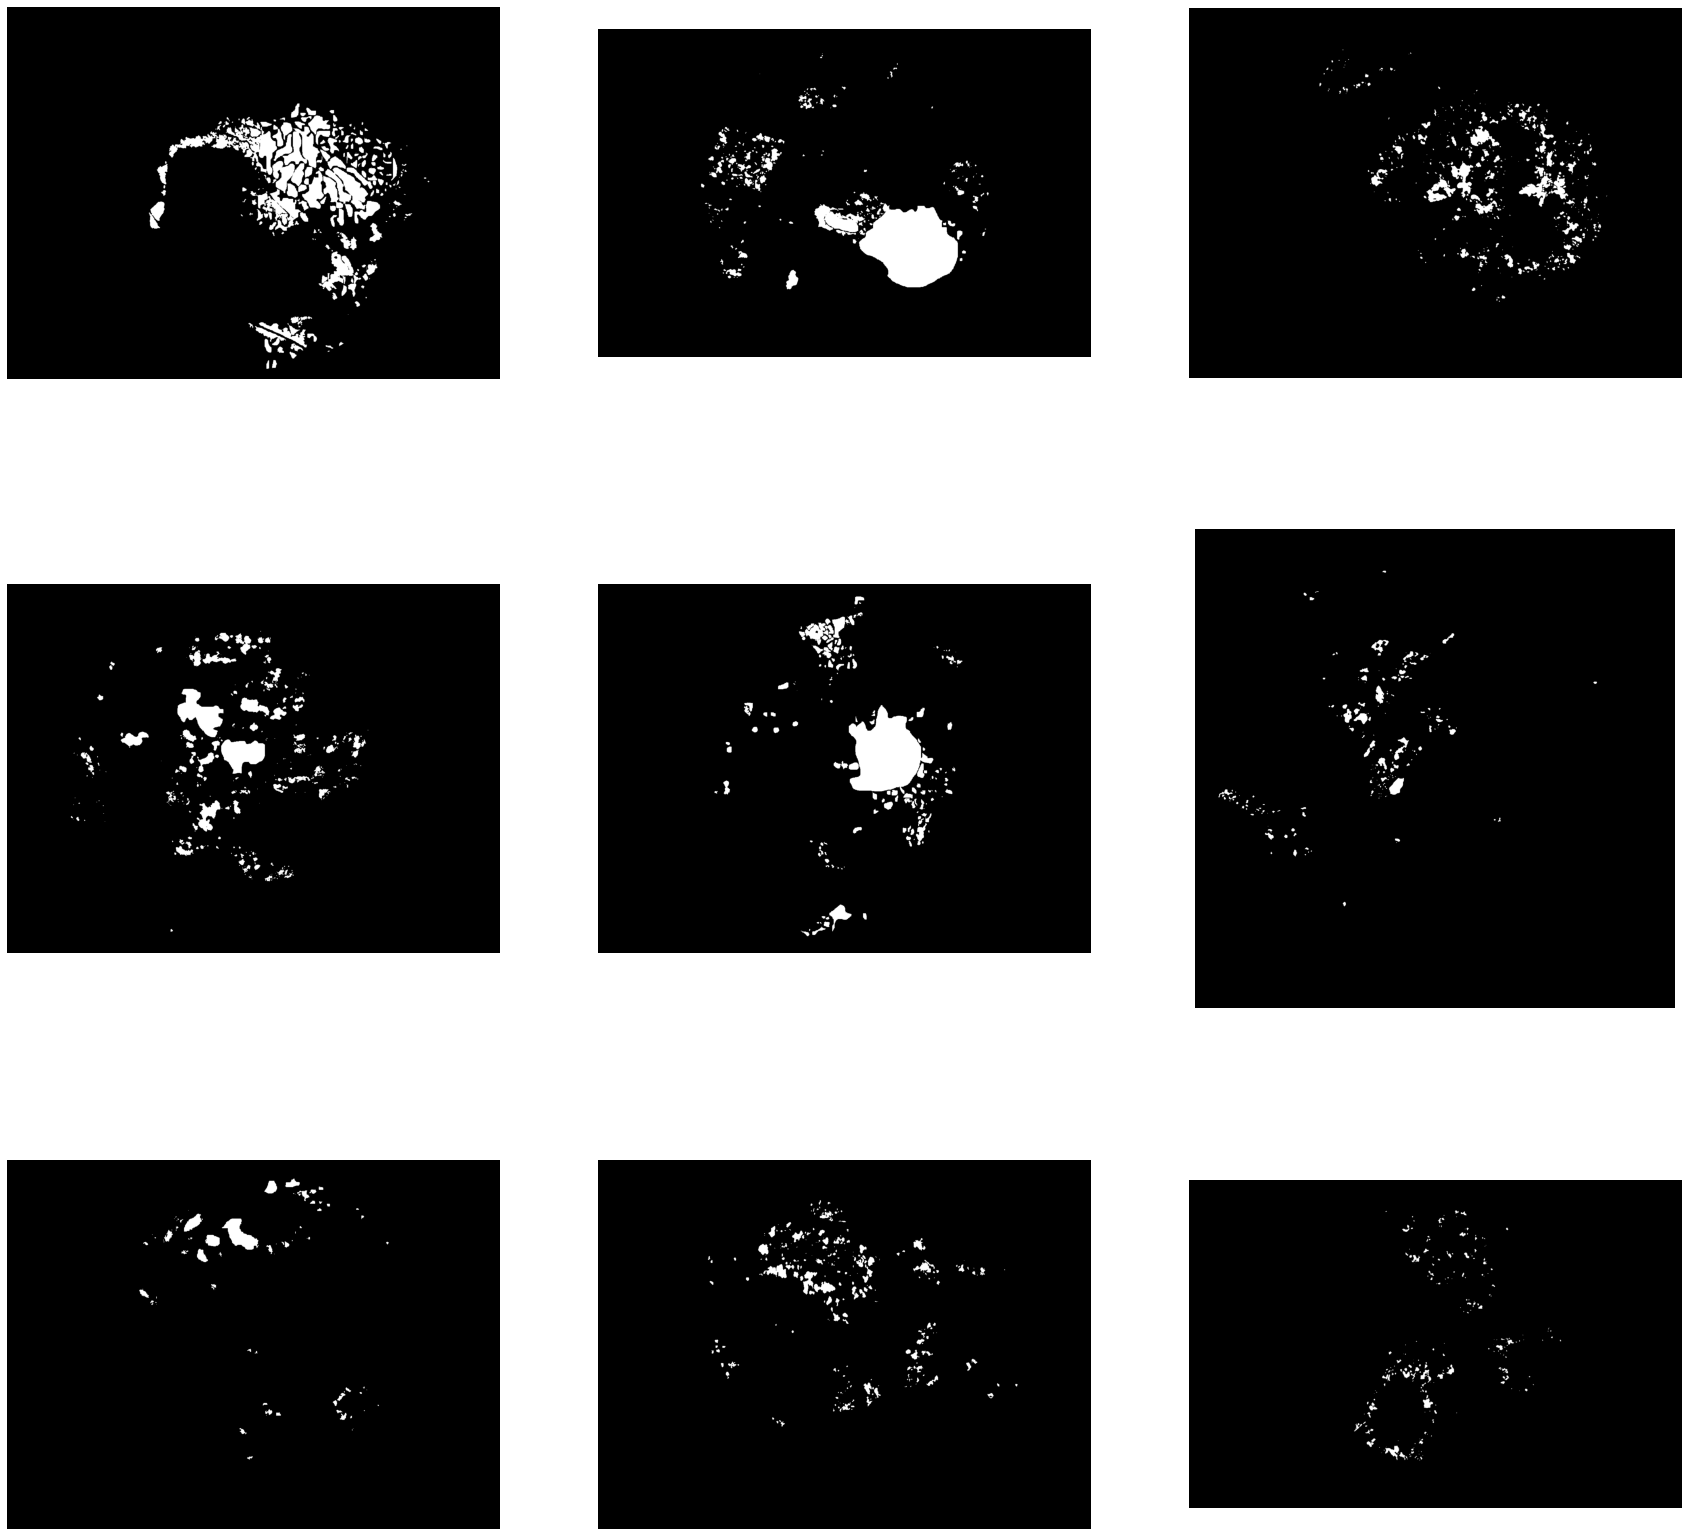

In [49]:
visualize_mask_area(EX_path_base_area)

In [50]:
fore_SE = get_area(SE_mask)

In [51]:
SE_path_base_area = sorted(list(zip(SE_mask, fore_SE)), key = lambda i: i[1], reverse=True)

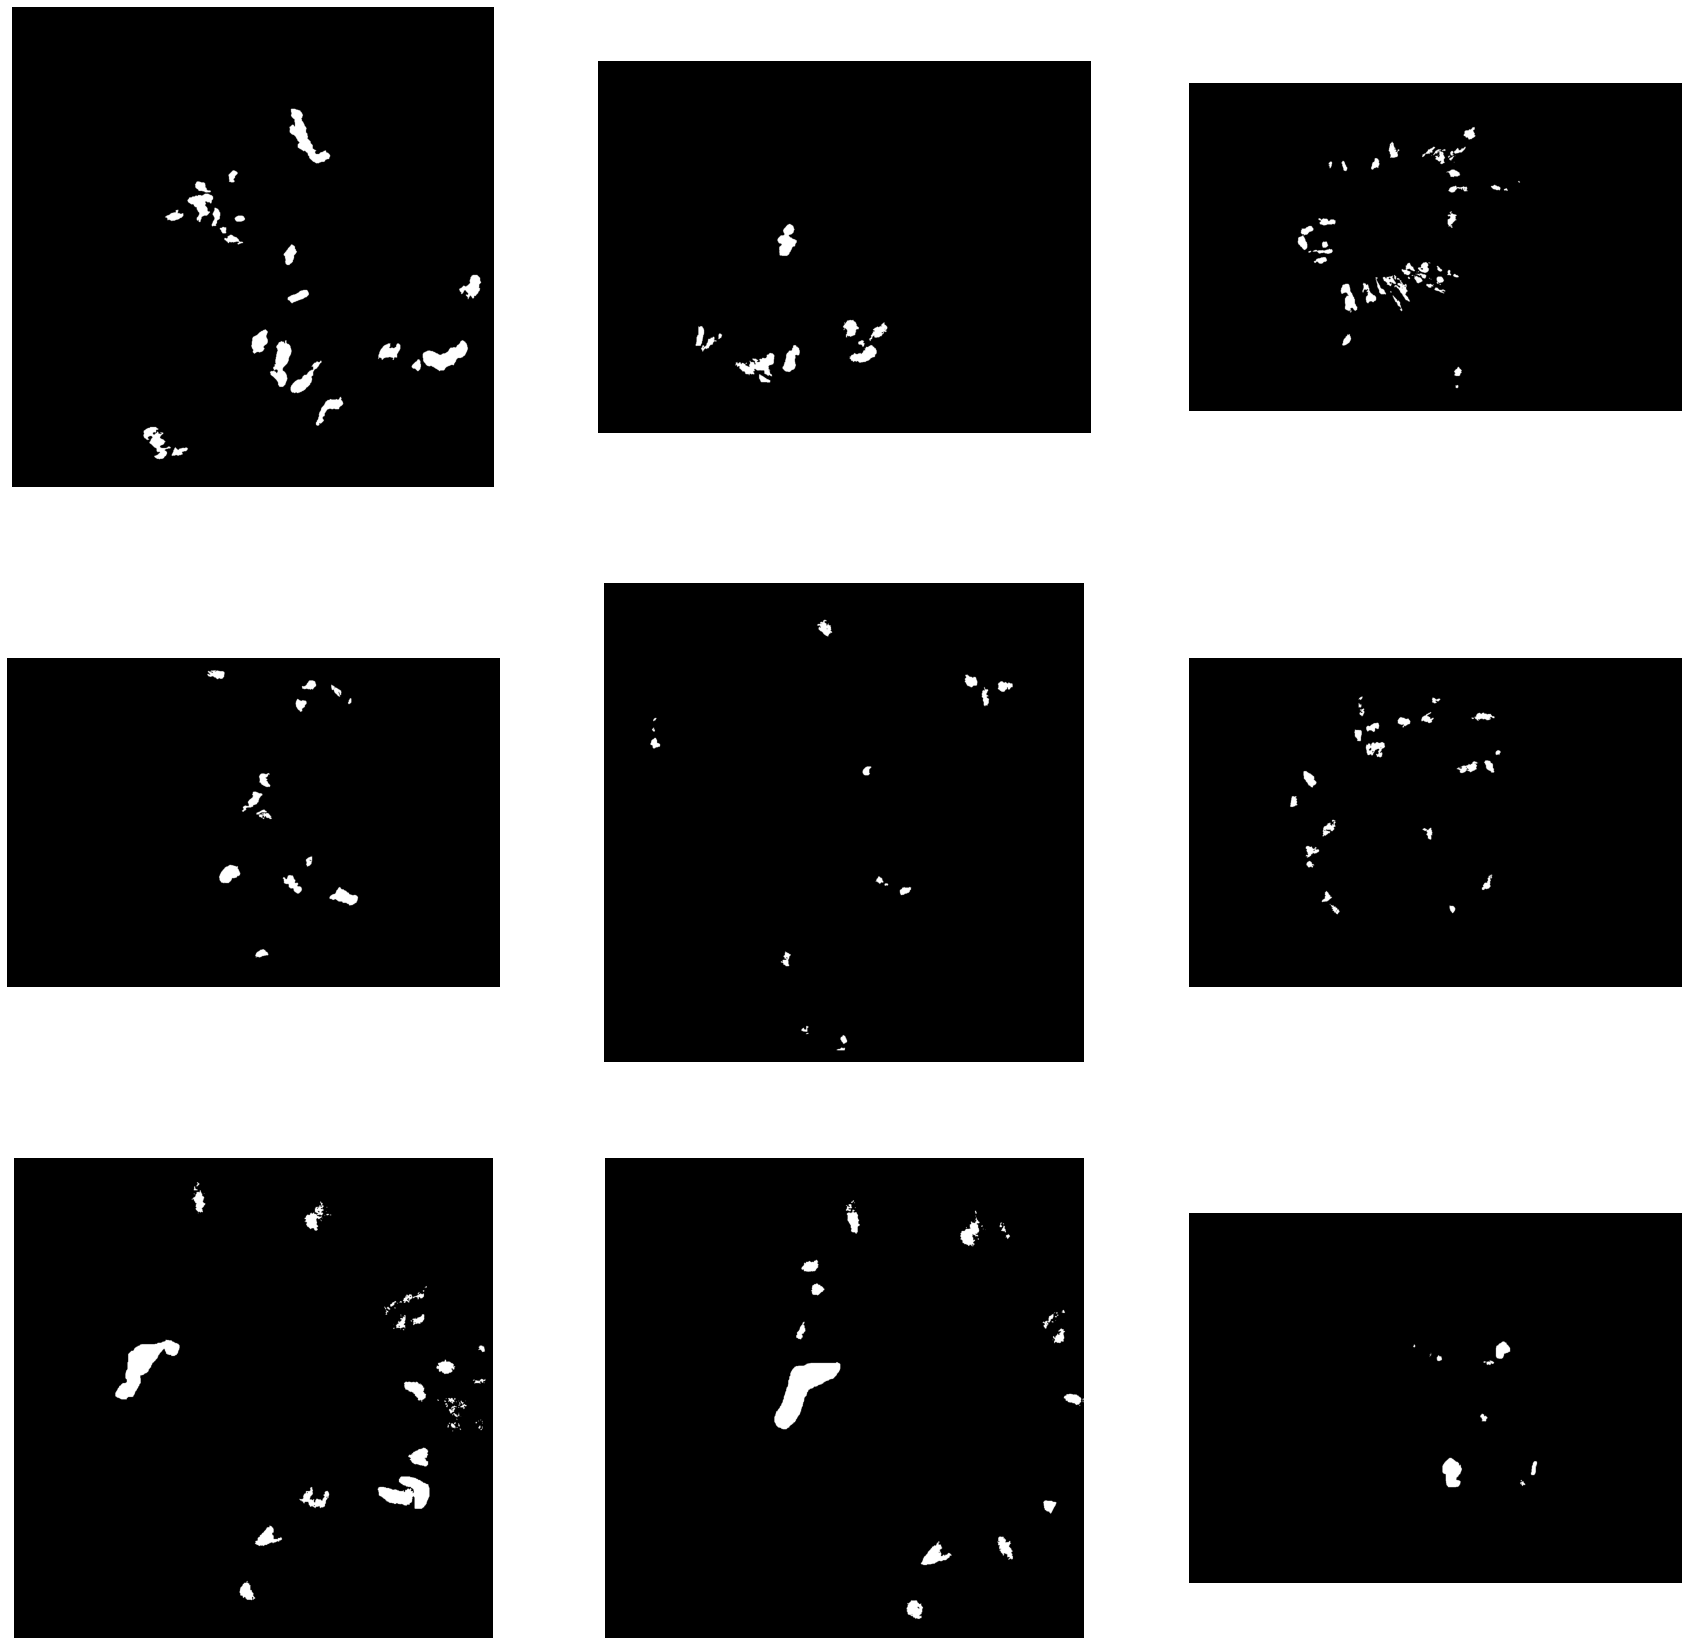

In [52]:
visualize_mask_area(SE_path_base_area)

In [53]:
fore_HE = get_area(HE_mask)

In [54]:
HE_path_base_area = sorted(list(zip(HE_mask, fore_HE)), key = lambda i: i[1], reverse=True)

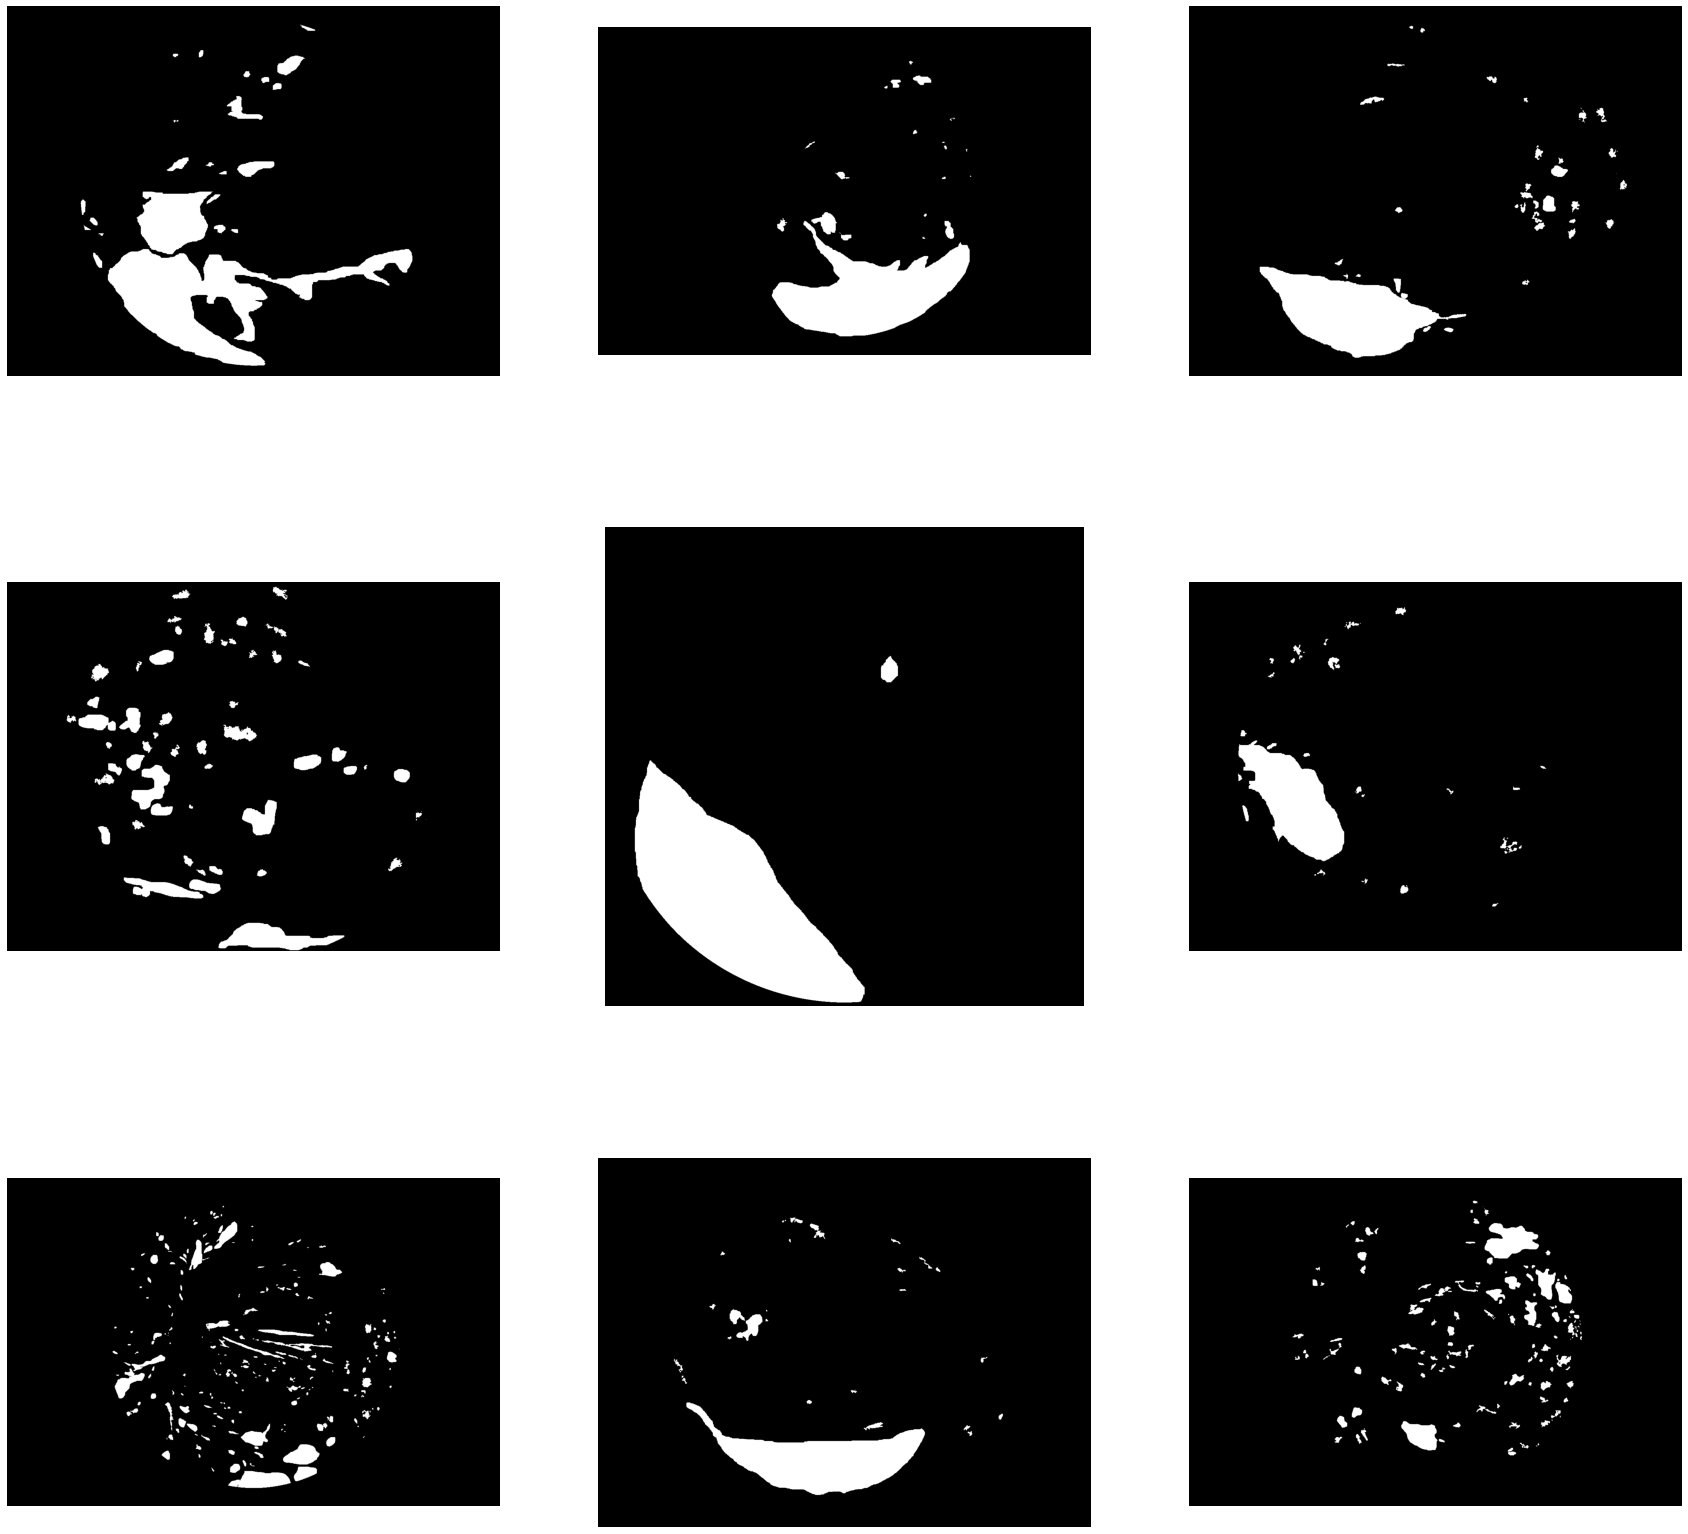

In [55]:
visualize_mask_area(HE_path_base_area)